<a href="https://colab.research.google.com/github/lojithv/Machine-Learing-Practicles/blob/main/All_practicles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Analysis**

## Regression Types


##**Simple Regression**

## **1. Simple Regression for Single Variables**

---



**Step 1: Upload File via Interface**

In [ ]:
import pandas as pd   # need to work with external data elements (Upload files)
import numpy as np   # for mathematical calculations & pandas is relying on numpy
import matplotlib.pyplot as plt   # for visualization purposes ( visualization of data distributions)
from sklearn import linear_model   # in order to do a linear regression
from google.colab import files   # to upload an external file to the program
uploaded = files.upload()    # to store the uploaded files





Saving values.csv to values (2).csv


**Step 2 : Read, Store and Print file**

In [ ]:
import io
df = pd.read_csv(io.StringIO(uploaded['values.csv'].decode('utf-8'))) # read CSV file and store in a data frame instance
print(df) # print data of the file

   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000


**Step 3 : Plotting Values on a table**

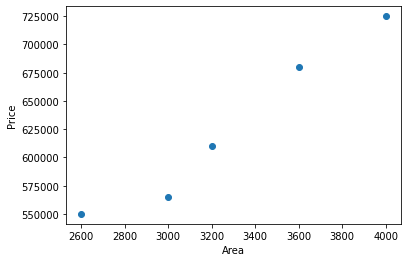

In [ ]:
plt.xlabel('Area') # Labeling x axis
plt.ylabel('Price') # Labeling y axis
plt.scatter(df.area,df.price) # Plotting

**Step 4: Arrange/Create/train Linear model**

To traing ML model to do the predictions





In [ ]:
reg = linear_model.LinearRegression() # creating machine leaning model (Skelton of the model) and store it in variable called reg
reg.fit(df[['area']],df.price) # real training will take place with independent(Area) and dependent(Price) values

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Note : df[['area']] means 2D array

program identify area as independet and price as dependent.

We have to define and input Independent variable using 2D array

After this step we have trained model.

**Step 5: Do Predictions**

In [ ]:
reg.predict([[1000]])  # Input Area -> Output Price

array([316404.10958904])

**Step 6: Mannualy Check the predicted value is correct or wrong** 

then get coefficent

In [ ]:
reg.coef_

array([135.78767123])

and Interception

In [ ]:
reg.intercept_

180616.43835616432

y = mx + c

y = 135.787 * 1000 + 180616.438 

## **2. Simple Regression for Multiple Variables**

Adress missing value problem in pre processing stage

**Price= m1 * area + m2 * bedrooms + m3 * age + b**

Dependent variable = Price

Independent variable = area, bedrooms, age

Interception = b

coefficents = m1, m2, m3

y = m1.x1 + m2.x2 + m3.x3 + b


In [30]:
import pandas as pd   # need to work with external data elements (Upload files)
import numpy as np   # for mathematical calculations
import matplotlib.pyplot as plt   # for visualization purposes ( visualization of data distributions)
from sklearn import linear_model   # in order to do a linear regression
from google.colab import files   # to upload an external file to the program
uploaded = files.upload()    # to store the uploaded files

Saving values_multi_variable.csv to values_multi_variable (2).csv


In [31]:
import io
df = pd.read_csv(io.StringIO(uploaded['values_multi_variable.csv'].decode('utf-8'))) # read CSV file and store in a data frame instance
print(df) # print data of the file

   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       NaN   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  725000


 **Step 1: Missing Value handling**

In [34]:
import math
median_beds = math.floor(df.bedrooms.median())  # get median bedrooms count to fill missing value
df.bedrooms = df.bedrooms.fillna(median_beds)    # add the missing value to the data set, via pandas df dataframe
print(df)

   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       3.0   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  725000


**Step 2 : Train the model**

In [36]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price) # three independent variables and one dependent variable

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Step 3: Do the prediction**

In [50]:
reg.predict([[4000, 2, 20]])  # Input Area, bedrooms, age -> Output Price

array([734462.5])

**Step 4 : Mannualy Check the predicted value is correct or wrong**

In [38]:
reg.coef_ # we will get three values as coeffitents m1, m2, m3

array([   122.375, -30137.5  ,  -6037.5  ])

In [39]:
reg.intercept_

425987.4999999998

## **Logistic Regression**

## **3.Binary logistics regression**

In [51]:
import pandas as pd   # need to work with external data elements (Upload files)
import numpy as np   # for mathematical calculations
import matplotlib.pyplot as plt   # for visualization purposes ( visualization of data distributions)
from sklearn import linear_model   # in order to do a linear regression
from google.colab import files   # to upload an external file to the program
uploaded = files.upload()    # to store the uploaded files

Saving insuarance.csv to insuarance.csv


In [54]:
import io
df = pd.read_csv(io.StringIO(uploaded['insuarance.csv'].decode('utf-8'))) # read CSV file and store in a data frame instance
print(df) # print data of the file

    age  Insurance
0    22          0
1    45          0
2    56          1
3    68          1
4    29          0
5    30          1
6    88          0
7    50          1
8    19          0
9    15          0
10   53          1
11   89          0
12   66          1
13   49          1
14   51          1
15   13          0
16   20          0
17   34          0
18   25          0
19   31          0
20   62          1
21   68          1
22   17          0
23   59          1
24   27          0
25   57          1
26   72          1
27   28          0
28   35          0


**Step 1: Plot data**

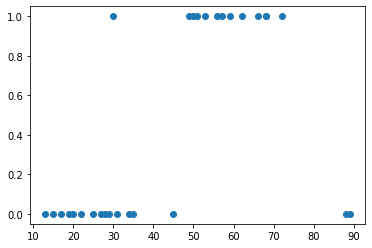

In [56]:
%matplotlib inline
plt.scatter(df.age,df.Insurance) # Plotting

We cannot use linear approach for this, therefor we use logistic approach

**Step 2: Do Cross validation before training**

In [79]:
from sklearn.model_selection import train_test_split # data set divided for training and testing
x_train, x_test, y_train, y_test = train_test_split(df[['age']],df[['Insurance']],test_size=0.1) # test_size = 0.1 means 10% recerved for testing, 90% use for training
y_test


,Insurance
6,0
14,1
13,1


**Step 3: Create/train Logistic model**

In [83]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()  # structure of the model
model.fit(x_train,y_train)  # Train the model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Step 4 : Predict/ test the model**

In [80]:
model.predict(x_test)

array([1, 1, 1])

In [75]:
model.predict([[35]])  # predict for specific age

array([0])

In [81]:
model.score(x_test,y_test)  # check the accuracy of the model, because of small amount of training data

0.6666666666666666

In [82]:
model.predict_proba(x_test)  # check probability of apply for insurance (Apply vs Not)

array([[0.01411919, 0.98588081],
       [0.33480231, 0.66519769],
       [0.37891855, 0.62108145]])

Note : Overfitting 

Overfitting denotes the model has been over trained on a small data set. Usually in a over fitting model accuracy score will be close to 100%. But when model exposed to real world scenarios prediction accuracies will be reveal at lower percentage. Overfitting model is tightly attach to the limited dataset provided. In order to overcome overfitting need to have a larger data set and cross validation has to be applied. In cross validation different training and testing samples can be derived. The model has to be trained itteratively not on the same dataset but variety of datasets.